<a href="https://colab.research.google.com/github/journey-Ji/Python-Data-Image/blob/main/OpenCV%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV의 소개 및 기본 사용법

OpenCV: 영상처리와 컴퓨터 비전을 위한 오픈소스 라이브러리

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving resize_cat.jpeg to resize_cat (1).jpeg


OpecCV에서는 색상을 R,G,B순서가 아닌 B,G,R순서로 읽는다.

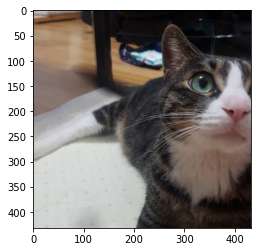

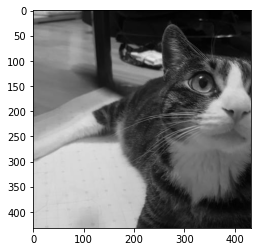

In [ ]:
import cv2
import matplotlib.pyplot as plt #colab에서는 이미지 처리를 위해 matplotlib을 이용해야 한다.

img_basic = cv2.imread('resize_cat (1).jpeg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic,cv2.COLOR_BGR2RGB))
plt.show()

img_basic=cv2.cvtColor(img_basic,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic,cv2.COLOR_GRAY2RGB))
plt.show()

# OpenCV 이미지 연산

이미지 크기 및 픽셀 확인

In [ ]:
import cv2

image=cv2.imread('resize_cat.jpeg')
# 픽셀 수 및 이미지 크기 확인
print(image.shape)
print(image.size)

#이미지 numpy 객체의 특정 픽셀을 가리킨다.
px=image[100,100] #단, BGR순서로 출력이되며, gray scale의 경우 BGR로 구분되지 않는다

print(px) 

print(px[2]) #BGR중 R값만 출력하기


(432, 432, 3)
559872
[102 139 173]
173


특정 범위 픽셀 변경

---0.019389629364013672 seconds ---
---0.0003516674041748047 seconds ---


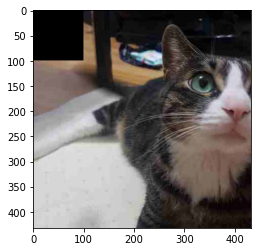

In [ ]:
import cv2
import matplotlib.pyplot as plt
import time

image=cv2.imread('resize_cat.jpeg')

start_time=time.time()
for i in range(0,100):
  for j in range(0,100):
    image[i,j]=[255,255,255]
print('---%s seconds ---'%(time.time()-start_time))


start_time=time.time()
image[0:100, 0:100]=[0,0,0]
print('---%s seconds ---'%(time.time()-start_time))


plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

#연산결과를 통해 아래쪽의 연산이 약3~40배 가량 빠르게 작용함을 알 수 있다.

ROI 추출 및 복사

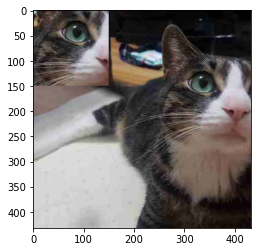

In [ ]:
import cv2
import matplotlib.pyplot as plt

image=cv2.imread('resize_cat.jpeg')

#Numpy slicing :ROI처리 가능
roi=image[100:250, 250:400]

image[0:150, 0:150]=roi

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

픽셀별로 색상 다루기

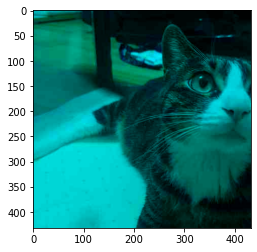

In [ ]:
import cv2
import matplotlib.pyplot as plt

image=cv2.imread('resize_cat.jpeg')
image[:,:,2]=0 #모든 픽셀에 대하여 index[2](Red=빨간색)의 값을 0으로 둠

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

# OpenCV 이미지 변형

이미지 크기 조절 

*Interpolation(보간법) : 이미지의 크기를 키울 때, 새로 생겨나는 pixel들을 처리하는 방법

주로 INTER_CUBIC과 INTER_AREA가 많이 사용된다

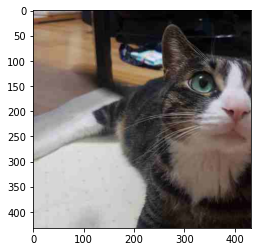

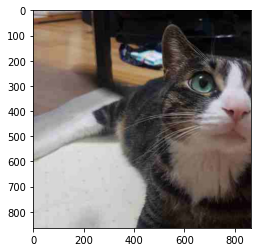

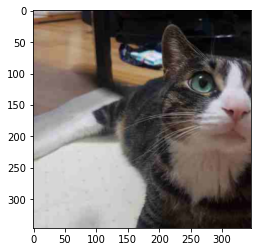

In [ ]:
import cv2
import matplotlib.pyplot as plt

image=cv2.imread('resize_cat.jpeg')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
#matplotlib은 RGB순서로 데이터를 처리하기 때문에 위의 소스코드과정이 필요함
plt.show()

expand=cv2.resize(image,None, fx=2.0,fy=2.0,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand,cv2.COLOR_BGR2RGB))
plt.show()

shrink=cv2.resize(image,None,fx=0.8,fy=0.8,interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink,cv2.COLOR_BGR2RGB))
plt.show()


이미지 위치 변경

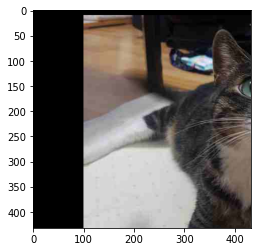

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image=cv2.imread('resize_cat.jpeg')

#행과 열 정보만 저장합니다.
height,width=image.shape[:2]
M=np.float32([[1,0,100],[0,1,10]])
dst=cv2.warpAffine(image,M,(width,height))

plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()



이미지 회전

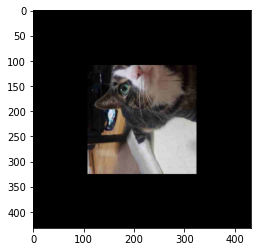

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image=cv2.imread('resize_cat.jpeg')

height,width=image.shape[:2]

#getRotationMatrix2D()함수가 알아서 회전변환행렬을 만들어줌
M=cv2.getRotationMatrix2D((width/2,height/2),90,0.5) #너비와 높이를 통해 정중앙을 회전중심으로 설정, 회전각90, 크기0.5배
dst=cv2.warpAffine(image,M,(width, height))

plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()

# OpenCV 이미지 합치기


이미지를 겹쳐서 합치기 
방법 1:cv2.add()함수 이용(saturation연산)
방법 2:np.add()함수 이용(Modulo연산-나머지연산)

In [7]:
from google.colab import files
uploaded=files.upload()


Saving image_1.jpg to image_1.jpg


In [8]:
from google.colab import files
uploaded=files.upload()

Saving image_2.jpeg to image_2.jpeg


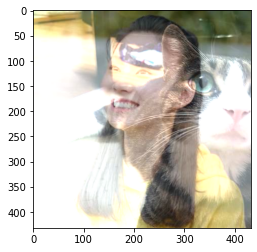

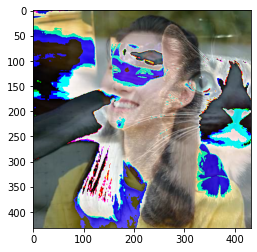

In [10]:
import cv2
import matplotlib.pyplot as plt

image_1=cv2.imread('image_1.jpg')
image_2=cv2.imread('image_2.jpeg')

result=cv2.add(image_1,image_2)
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))#saturation연산 / 더해서255초과시 255를pixcel값으로 사
plt.show()

result=image_1+image_2 #Modulo연산 /더한값%255 즉, 나머짓값을pixcel값으로 사용
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.show()

# OpenCV 임계점 처리하기


threshold:임계값을 기준으로 흑/백으로 분류하는 점수

In [20]:
from google.colab import files 
uploaded=files.upload()

Saving resize_hand_writing_image.jpg to resize_hand_writing_image.jpg


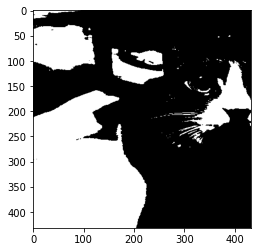

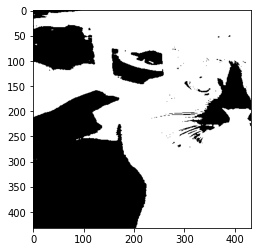

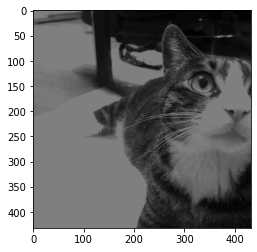

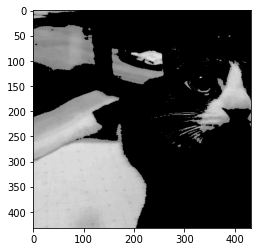

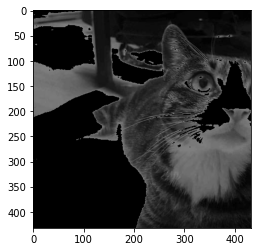

In [15]:
import cv2
import matplotlib.pyplot as plt

image=cv2.imread('gray_image.jpg',cv2.IMREAD_GRAYSCALE)

images=[]
ret,thres1=cv2.threshold(image,127,255,cv2.THRESH_BINARY)
ret,thres2=cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
ret,thres3=cv2.threshold(image,127,255,cv2.THRESH_TRUNC)
ret,thres4=cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
ret,thres5=cv2.threshold(image,127,255,cv2.THRESH_TOZERO_INV)

images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
  plt.imshow(cv2.cvtColor(i,cv2.COLOR_GRAY2RGB))
  plt.show()

이미지 적응 임계점 처리
cv2.adaptiveTzhreshold(이미지변수,임계값,임계값계산법,처리방식,영역의 크기,평균에서 차감할 값)

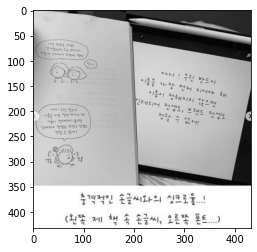

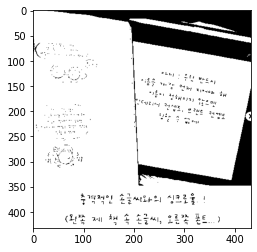

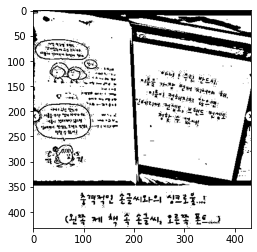

In [21]:
import cv2

image=cv2.imread('resize_hand_writing_image.jpg',cv2.IMREAD_GRAYSCALE)

ret,thres1=cv2.threshold(image,127,255,cv2.THRESH_BINARY)
#THRESH_MEAN : 필터값을 넘어가는 모든 값을 255로 바꿔버림/ 이 필터값은 이미지 내에서 자동으로 정해진다.
thres2=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,3)

plt.imshow(cv2.cvtColor(image,cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1,cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2,cv2.COLOR_GRAY2RGB))
plt.show()